In [41]:
from textblob import _text
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn import metrics

In [42]:
data = pd.read_csv('twitter-2016test-A-clean.tsv', sep='\t')
df = pd.DataFrame(data)

# Finding the sentiment polarity with Textblob library

In [43]:
polar_tab = []

for sent in df['text']:
       blob_sent = TextBlob(sent)
       pol_value = blob_sent.sentiment.polarity
       polar_tab.append(pol_value)

# Using pandas method cut in order to seperate the three classes 

In [44]:
# df['pred_sent'] = polar_tab
polar = np.array(polar_tab)
df['values'] = polar
print("Thresholds",pd.cut(polar,3))
three_polars = pd.cut(polar,3, labels=["negative", "neutral", "positive"])
print(three_polars)
df['pred_sent'] = three_polars
print(df)

Thresholds [(-0.333, 0.333], (-0.333, 0.333], (-0.333, 0.333], (0.333, 1.0], (-0.333, 0.333], ..., (-0.333, 0.333], (-0.333, 0.333], (-1.002, -0.333], (-0.333, 0.333], (-0.333, 0.333]]
Length: 15651
Categories (3, interval[float64]): [(-1.002, -0.333] < (-0.333, 0.333] < (0.333, 1.0]]
[neutral, neutral, neutral, positive, neutral, ..., neutral, neutral, negative, neutral, neutral]
Length: 15651
Categories (3, object): [negative < neutral < positive]
                 tweet_id sentiment  \
0      619950566786113536   neutral   
1      619969366986235905   neutral   
2      619974445185302528   neutral   
3      619987808317407232  positive   
4      619994586182619136  positive   
...                   ...       ...   
15646  681877834982232064   neutral   
15647  681879579129200640  positive   
15648  681883903259357184   neutral   
15649  681904976860327936  negative   
15650  681910549211287552   neutral   

                                                    text    values pred_sent 

In [45]:
print("////Before extensive search/////")
print("Accuracy of the prediction",metrics.accuracy_score(df['sentiment'],df['pred_sent']))
print("Precision of the prediction",metrics.precision_score(df['sentiment'],df['pred_sent'],average=None))
print("Recall of the prediction",metrics.recall_score(df['sentiment'],df['pred_sent'],average=None))
print("F-Score of the prediction",metrics.f1_score(df['sentiment'],df['pred_sent'],average=None))

print(metrics.confusion_matrix(df['sentiment'],df['pred_sent']))

////Before extensive search/////
Accuracy of the prediction 0.5636061593508402
Precision of the prediction [0.43053817 0.5587957  0.61388286]
Recall of the prediction [0.14891775 0.82867713 0.36005089]
F-Score of the prediction [0.22129302 0.6674887  0.45388933]
[[ 344 1740  226]
 [ 323 6496 1020]
 [ 132 3389 1981]]


# This part is to find the best values that we have to seperate the classes by doing a step to step search

In [46]:
best_neg = 0
best_pos = 0
best_acc = 0
new_polar = []
best_column = []


for max_neg in np.arange(-0.400,-0.300,0.005):

       for max_pos in np.arange(0.300, 0.400, 0.005):

              for value in df['values']:
                     if value > max_pos:
                            new_polar.append('positive')
                     elif value < max_neg:
                            new_polar.append('negative')
                     else:
                            new_polar.append('neutral')
              df['new_polar'] = np.array(new_polar)
              # print(df['new_polar'])
              new_polar.clear()
              if (metrics.accuracy_score(df['sentiment'],df['new_polar'])) > best_acc:
                     best_neg = max_neg
                     best_pos = max_pos
                     best_acc = metrics.accuracy_score(df['sentiment'],df['new_polar'])
                     best_precision = metrics.precision_score(df['sentiment'], df['new_polar'], average=None)
                     best_recall = metrics.recall_score(df['sentiment'], df['new_polar'], average=None)
                     best_fscore = metrics.f1_score(df['sentiment'], df['new_polar'], average=None)
                     best_column = df['new_polar'].tolist()
              del df['new_polar']

# Showing the results of the best negative and positive thresholds

In [47]:
df['new_polar'] = np.array(best_column)
print("///// After the search //////")
print("The best accuracy after the extensive search",best_acc)
print("Best negative threshold",best_neg)
print("Best positive threshold",best_pos)
print("Best Precision of the prediction",metrics.precision_score(df['sentiment'],df['new_polar'],average=None))
print("Best Recall of the prediction",metrics.recall_score(df['sentiment'],df['new_polar'],average=None))
print("Best F-Score of the prediction",metrics.f1_score(df['sentiment'],df['new_polar'],average=None))


print(metrics.confusion_matrix(df['sentiment'],df['new_polar']))

///// After the search //////
The best accuracy after the extensive search 0.5709539326560603
Best negative threshold -0.4
Best positive threshold 0.3
Best Precision of the prediction [0.46615087 0.56235516 0.61527419]
Best Recall of the prediction [0.104329   0.8358209  0.38949473]
Best F-Score of the prediction [0.17049876 0.67234479 0.47701725]
[[ 241 1827  242]
 [ 189 6552 1098]
 [  87 3272 2143]]


[[ 241 1827  242]
 [ 189 6552 1098]
 [  87 3272 2143]]


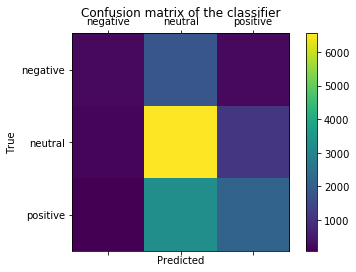

In [48]:
import  matplotlib.pyplot as plt
labels = ['negative', 'neutral','positive']
cm = metrics.confusion_matrix(df['sentiment'],df['new_polar'], labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()